# Neural Networks 

Using a linear equation, step function, bias unit

Refreshes some of the content from term 1 in Perceptrons.

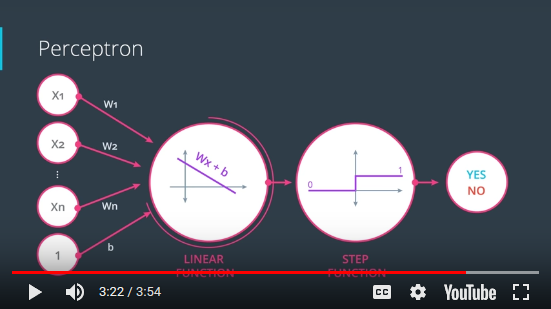


## Trick: Make a Line Move Closer to a Point

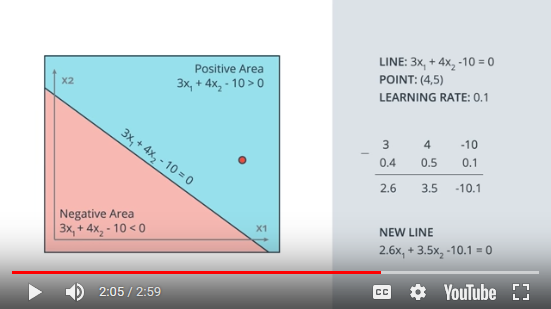

Modify the eq of the line using the coords of the point, plus bias unit

3x1 + 4x2 - 10 = 0, point (4,5)

3 4 -10
subtract 4 5 1
= -1 -1 -11

new line moved too much

so add a learning rate, and compare again

3 4 -10
subtract 4*0.1 5*0.1 1*0.1
= 2.6 3.5 -10.1

subtract if line is below the point
add if the line is above the point



In [1]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(40)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        W[0] += (y[i]-y_hat) * X[i][0]*learn_rate
        W[1] += (y[i]-y_hat) * X[i][1]*learn_rate
        b += (y[i]-y_hat) * learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


## Error Functions

Mount Errorest...

Error function must be continuous (cannot be discrete, since it is not differentiable) and differentiable

Error is the height of the mountain. Goal is to get to the bottom of the mountain

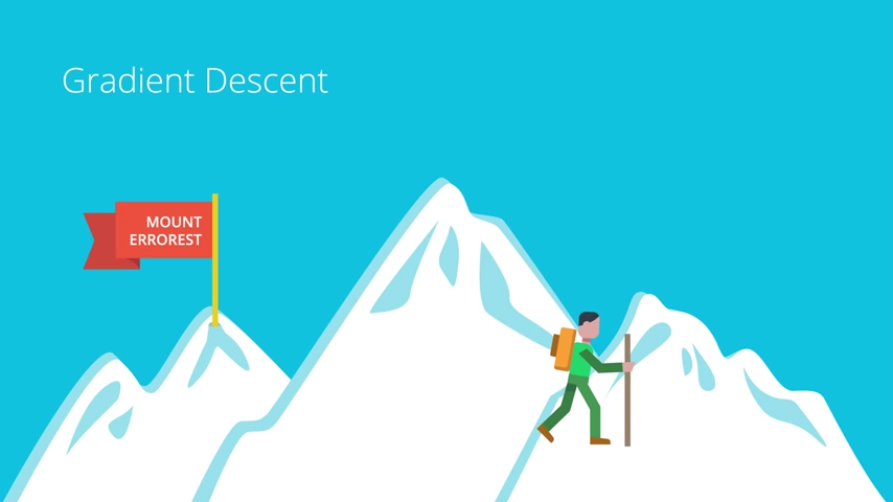

## Discrete vs. Continuous

Moving from discrete predictions to continuous predictions.

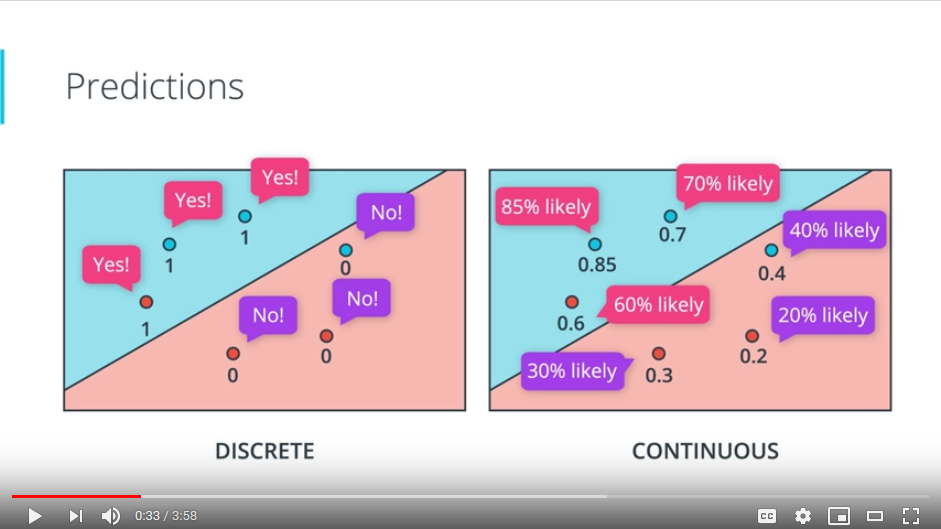

Change from a step function on the left, to the sigmoid function on the 
right.

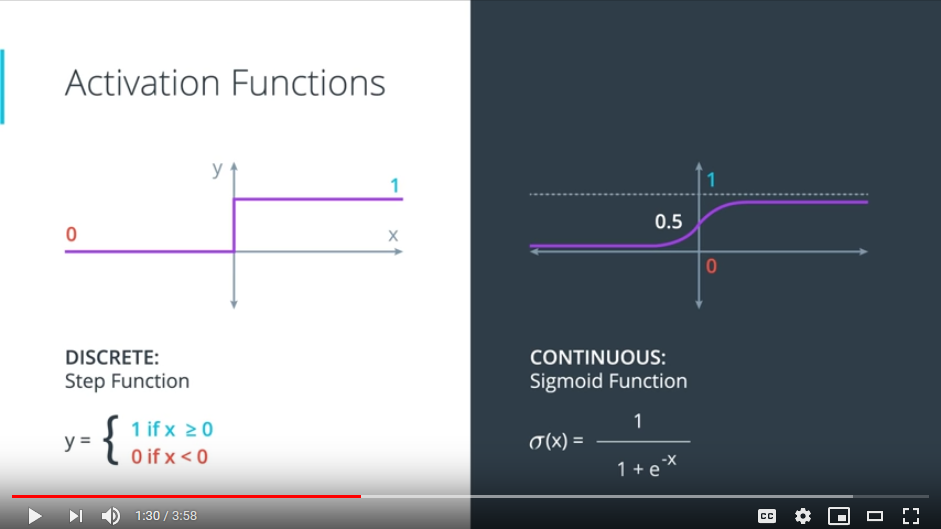

Allows probability from 0.0 to 1.0, instead of simply 0 and 1 of a step function. Now we have a probability space.

Combine Wx + b to the sigmoid function.

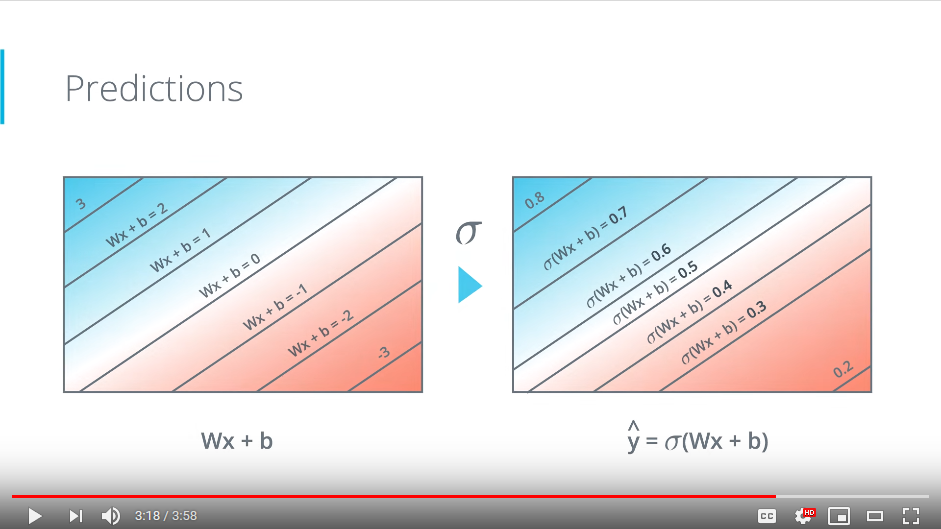


## Quiz Question

The sigmoid function is defined as sigmoid(x) = 1/(1+e-x). 

If the score is defined by 4x1 + 5x2 - 9 = score, then which of the following points has exactly a 50% probability of being blue or red? (Choose all that are correct.)



In [2]:
import numpy as np

x1 = 1
x2 = 1
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

x1 = 2
x2 = 4
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

x1 = 5
x2 = -5
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

x1 = -4
x2 = 5
x = 4 * x1 + 5 * x2 - 9
sigmoid_x = 1/(1+np.exp(-x))
print("sigmoid_x: ", sigmoid_x)

sigmoid_x:  0.5
sigmoid_x:  0.9999999943972036
sigmoid_x:  8.315280276641321e-07
sigmoid_x:  0.5


## Softmax

Sigmoid function for 3 or more classes.

https://en.wikipedia.org/wiki/Softmax_function

"In mathematics, the softmax function, also known as softargmax[1] or normalized exponential function,[2]:198 is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval ( 0 , 1 ) {\displaystyle (0,1)} (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes"



### Question 1 of 2

What function turns every number into a positive number?

ANSWER: Expodential


In [3]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    expL = np.exp(L) # get exp for each value in array
    sumExpL = sum(expL) # sum exp result of each
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL) # normalize
    return result


## One-Hot Encoding

Cannot use 0 and 1 for multiple classes.

Use 1 variable for each of the classes.

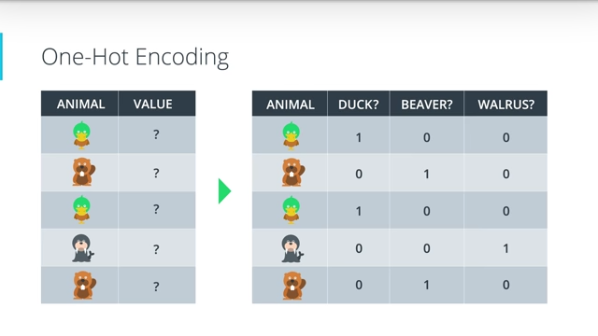

## Maximum Likelihood

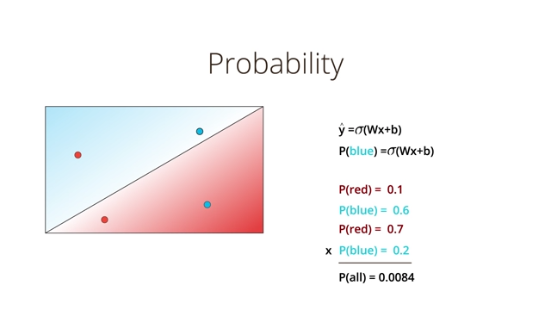

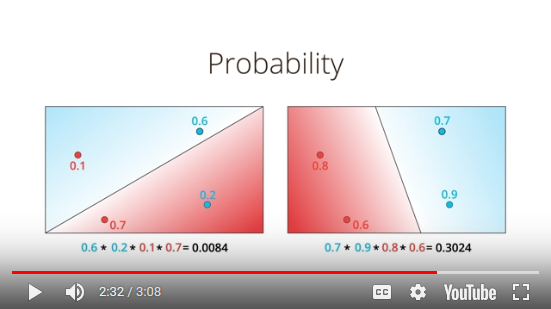

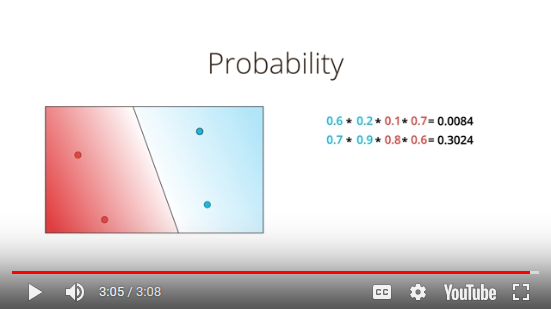

## Maximizing probabilities

Is maximising probability equivalent to minimizing the error function?

A log function turns products into sums. 

log(ab) = log(a) + log(b).

## Cross-Entropy

Take the log of 1 is zero. Take negative of the log to get positive probabilities. The sum of this is the cross-entropy. A good model with give us a low cross entropy (high probability).

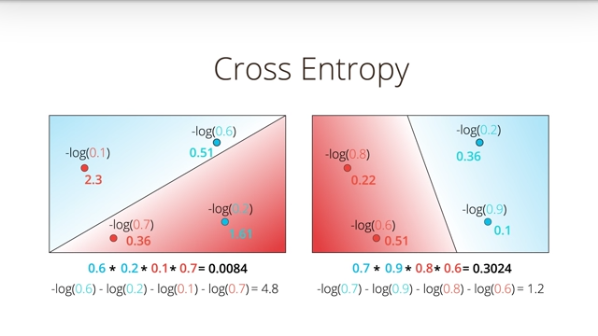

### Cross Entropy Formula

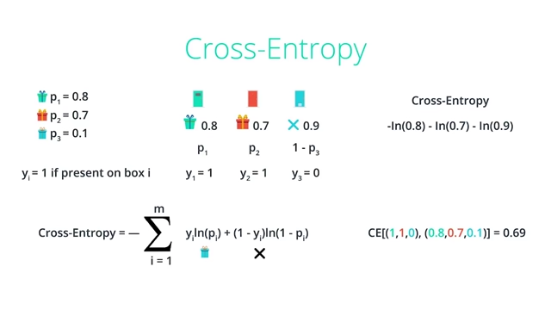

https://en.wikipedia.org/wiki/Cross_entropy

"In information theory, the cross entropy between two probability distributions p {\displaystyle p} p and q {\displaystyle q} q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme is used for the set is optimized for an estimated probability distribution q {\displaystyle q} q, rather than true distribution p {\displaystyle p} p."


In [4]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

## Multi-Class Cross Entropy

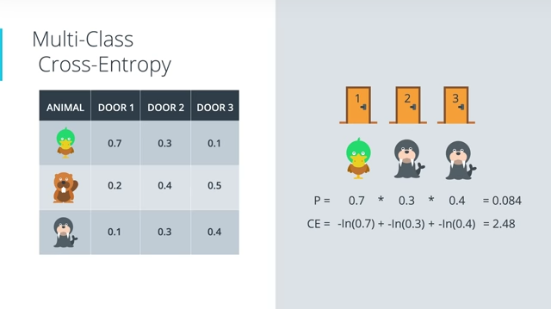

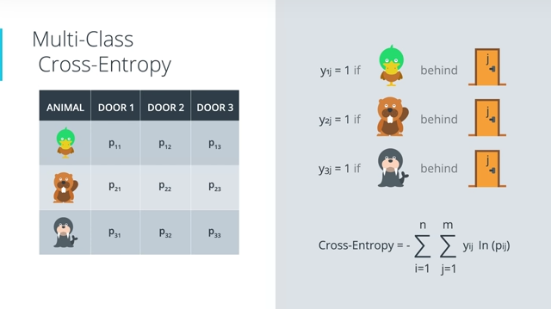

## Logistic Regression

Logistic Regression Algorithm
* Take your data
* Pick a random model
* Calculate the error
* Minimize the error, and obtain a better model
* Enjoy!

Error func is the true probability times log(prediction). For a binary classifier, for the 0 and 1 case this becomes:

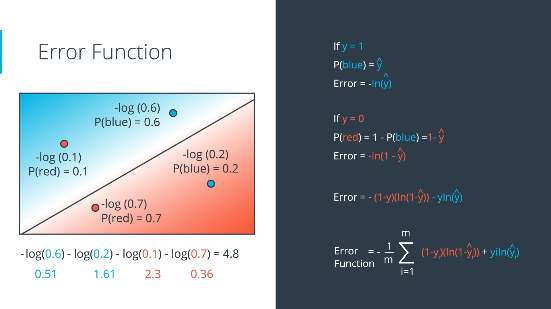

If we add a fit with multiple weights.

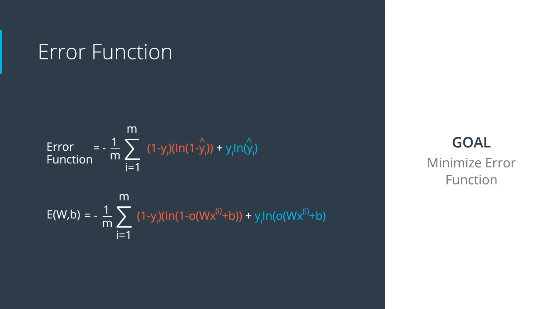

For multiple classes

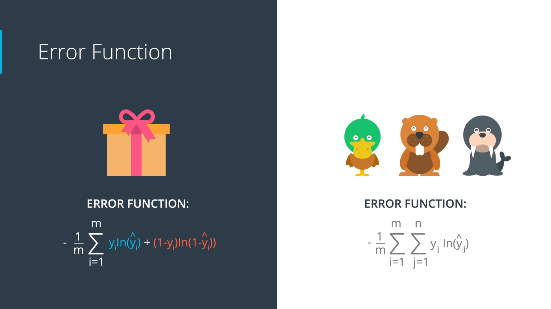

Combine with sigmoid function for a continuous probabilistic fit to data.

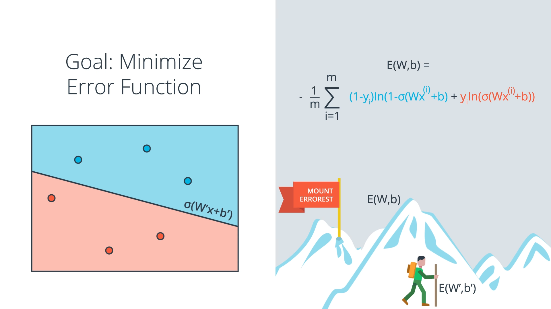



## Gradient Decent

The first thing to notice is that the sigmoid function has a really nice derivative. Namely,

σ′(x)=σ(x)(1−σ(x))

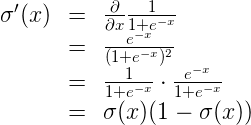

E = −1/m * (∑m,i=1) * (yi * ln(yi_hat) + (1 - yi)ln(1 − yi_hat)), where
y_hat = σ(Wx(i)+b).

Our goal is to calculate the gradient of E at a point x=(x1,…,xn), given by the partial derivatives

∇E=(∂/∂w1 * E, ⋯ , ∂/∂wn * E, ∂/∂b * E)

To simplify our calculations, we'll actually think of the error that each point produces, and calculate the derivative of this error. The total error, then, is the average of the errors at all the points.

The error produced by each point is, simply,

E = −y * ln(y_hat) − (1 − y)ln(1 − y_hat)

In order to calculate the derivative of this error with respect to the weights, we'll first calculate ∂/∂wj y_hat.

Recall that y^=σ(Wx+b), so:

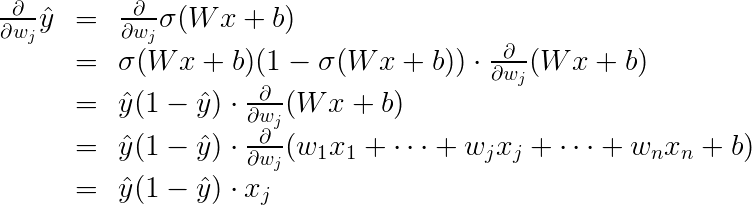

The last equality is because the only term in the sum which is not a constant with respect to wj is precisely wj*xj, which clearly has derivative xj.

Now, we can go ahead and calculate the derivative of the error EEE at a point x,x,x, with respect to the weight wj.w_j.wj.

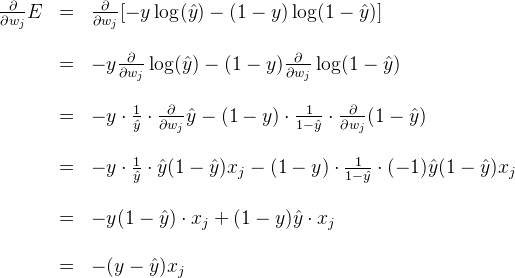

A similar calculation will show us that

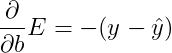

This actually tells us something very important. For a point with coordinates (x1,…,xn), label y and prediction y_hat, the gradient of the error function at that point is 

(−(y−y^)x1,⋯,−(y−y^)xn,−(y−y^)).

In summary, the gradient is

∇E = − (y − y_hat)(x1,…,xn,1).

If you think about it, this is fascinating. The gradient is actually a scalar times the coordinates of the point! And what is the scalar? Nothing less than a multiple of the difference between the label and the prediction. What significance does this have?

What does the scalar we obtained above signify? (Check all that are true.)
1. Closer the label to the prediction, smaller the gradient.
2. Farther the label from the prediction, larger the gradient

So, a small gradient means we'll change our coordinates by a little bit, and a large gradient means we'll change our coordinates by a lot.

### Gradient Decent Step

Since the gradient descent step simply consists in subtracting a multiple of the gradient of the error function at every point, then this updates the weights in the following way:

wi′ ← wi − α * [−(y−y_hat)xi],

which is equivalent to

wi′  ← wi + α(y−y_hat)xi.

Similarly, it updates the bias in the following way:

b′ ← b + α(y−y^), 

Note: Since we've taken the average of the errors, the term we are adding should be 1/m * α instead of α. But as α is a constant, in order to simplify calculations, we'll just take 1/m * α to be our learning rate, and abuse the notation by just calling it α.

## Logistic Regression Algorithm

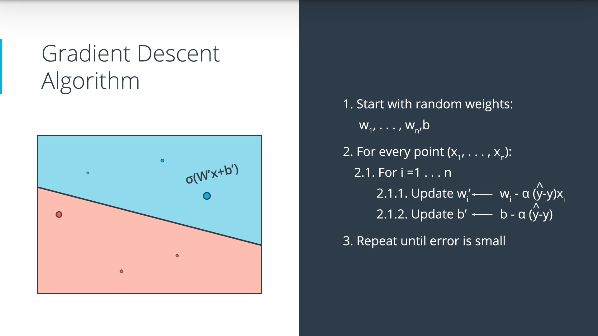


## Perception vs. Gradient Decent

Gradient decent can help since it is not just 0 and 1

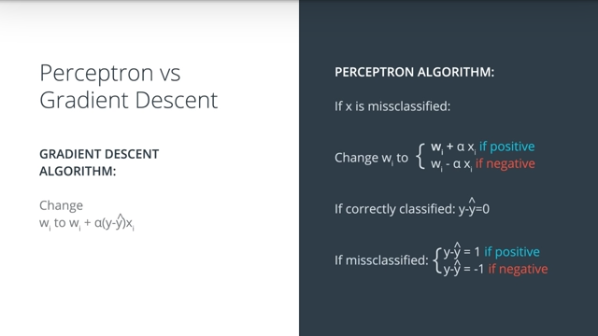

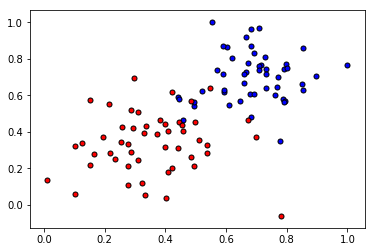


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


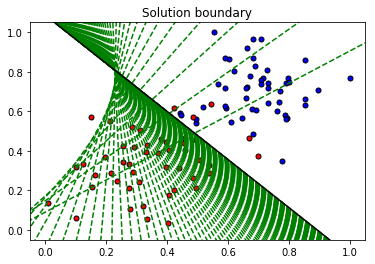

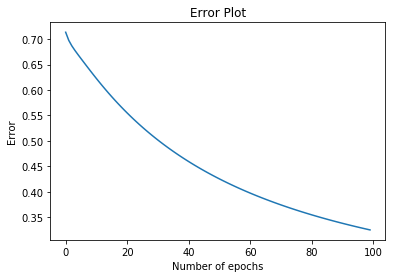

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)
    
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()    

# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output) # truth - prediction
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    
train(X, y, epochs, learnrate, True)